# Adaptive EMA Sampling for Alcohol Lapse Risk Prediction - A

Reinforcement Learning Approach

Jeongyeol Kwon (Department of X, University of Wisconsin-Madison)  
Kendra Wyant (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin (Department of Psychology, University of Wisconsin-Madison)  
February 26, 2025

Abstract here.

In [ ]:
# load libraries and read in data for printing results

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at C:/Users/kpaquette2/study_nn

# Introduction

Personal sensing is the collection and analyses of data collected via smartphone and other digital devices in the context of one’s day-to-day life \[@mohrPersonalSensingUnderstanding2017\].

Personal sensing data can be used as inputs into machine learning algorithms to predict important clinical psychological outcomes. Existing literature suggests behavior (substance use \[@wyantMachineLearningModels2024; @wyantLaggedPredictionsNextinprep; @baeMobilePhoneSensors2018; @waltersUsingMachineLearning2021; @robertsUsingMachineLearning2022; @baeLeveragingMobilePhone2023; @soysterPooledPersonspecificMachine2022\]), mood (depression \[@jacobsonPassiveSensingPrediction2020; @kimDepressionPredictionUsing2019; @razaviDepressionScreeningUsing2020\]; anxiety \[@jacobsonDigitalBiomarkersAnxiety2022\]), cognitive processes (craving \[@epsteinPredictionStressDrug2020; @dumortierClassifyingSmokingUrges2016\]; suicidal thoughts \[@czyzPredictingShorttermSuicidal2023\]), and even future mental health diagnoses (@horwitzIntensiveLongitudinalAssessment2024) can be predicted with high accuracy and temporal precision from personal sensing data.

Many mental health disorders, like substance use disorders, depression, and anxiety, are chronic conditions. After initial treatment and symptom reduction, individuals must continue to monitor their symptoms indefinitely.

Machine learning models can help individuals self-monitor changes in their risk for symptom-relapse and provide information about intervenable targets for lowering their risk (e.g., urge surfing for strong craving, behavioral activation for low motivation, and mindful breathing for acute and distressing physiological arousal).

The existing successful prediction models have almost exclusively relied on ecological momentary assessment (EMA) as the primary personal sensing data collection method. EMA consists of daily or more frequent brief self-report surveys pushed to an individual’s smartphone (i.e., prompts).

EMA offers insight into feelings, thoughts and behaviors. As such it is not surprising that it has been demonstrated to be highly predictive of clinical psychological outcomes.

EMA items are also often easily mapped on to support recommendations and targets for interventions. For example, the relapse prevention literature for substance use provides extant evidence-based recommendations for coping with strong cravings, stressful situations, and risky situations \[@marlattRelapsePreventionSecond2007; @witkiewitzTherapistsGuideEvidenceBased2007\].

EMA models that predict substance use with high temporal precision (i.e., alcohol use in the next 1-24 hours) have relied on densely sampled EMA (4-8x daily \[@wyantMachineLearningModels2024; @wyantLaggedPredictionsNextinprep; @waltersUsingMachineLearning2021; @soysterPooledPersonspecificMachine2022\]). While it appears frequent EMA sampling can be sustainable for discrete sampling periods (e.g. 1-3 months) \[@wyantAcceptabilityPersonalSensing2023; @jonesComplianceEcologicalMomentary2019\], it is less clear whether such sampling rates can be maintained indefinitely. Some evidence suggests individuals with substance use disorders can maintain 1x daily EMA for up to 1 year \[@moshontzProspectivePredictionLapses2021\]. Still, recovery is dynamic and often lifelong.

@wyantMachineLearningModels2024 have developed a machine learning model using 4x daily EMA that can predict alcohol lapses occurring in the next 24 hours with high accuracy (.90 area under the ROC curve \[auROC\]). This model can be used to provide personalized support recommendations to address immediate risks for possible lapses. For example, the model can be updated each day to provide individuals information about changes in their risk and make supportive recommendations based on the top features contributing to their risk.

While this model suggests promising clinical utility, frequent prompts each day could become burdensome. Engagement with the sensing method could drop leading to sparse feature sets. Similarly, individuals could become bored with the repetitive nature of questions, increasing the likelihood of careless or automatic responding without reflection.

Recognizing these limitations, we seek to apply a precision medicine approach to EMA sampling where individuals are only prompted to complete an EMA when the information is needed to maintain accurate lapse predictions.

Specifically we ran a stimulation study that…

# Methods

## Data Analytic Strategy

Models were run on an NVIDIA GeForce RTX 3090. <!--lets talk about what this is and if its important to include. If we keep it maybe add a sentence about why it was important to the analyses.-->

### Model Architecture

We formulate the survey design problem as offline reinforcement learning (RL). Specifically, we model the interaction with each participant as an episode. Our goal is to design a survey plan that maximizes the expected cumulative rewards (and minimize penalties) over all participants during the entire episodes. That is, we consider each participant as a new environment instantiated out of $N$ environments; each environment is simulated based on the offline survey data collected in.

In each episode with a participant, at each $t^{th}$ time-step, we either ask (1) whether or not to reveal the survey, or (2) to predict the next 24-hour window lapse. When we get the next survey $X_t$ from the participant (the former), we choose a binary action at deciding whether to reveal the survey or not; that is, we do not observe the survey ot = 0 without penalty if at = 0, and observe the received survey ot = Xt if at = 1, with a penalty depending on penalty levels. This penalty level is a control factor that balances the survey frequency and the prediction accuracy. If the environment asks to predict the next 24-hour window lapse event yt (the latter), an agent does not get any observation, only getting a hidden reward/penalty depending on whether the prediction is correct. <!--finish updating math syntax - see https://qmd4sci.njtierney.com/math.html-->

More specifically, our training pipeline can be described as consisting of three networks (summarizer network, policy network, prediction network; @fig-method).

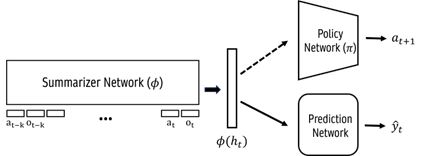

In [ ]:
knitr::include_graphics(path = here::here("figures/methods.png"), error = FALSE)

#### 1. Summarizer Network

Our default configuration employs transformer architectures for the summarizing model. For implementing the transformer model, we adhere to the minimal implementation of NanoGPT’s standard framework1. We use an Embedding layer for discrete actions. For the policy network, we employ the soft actor-critic method for discrete actions (SACD). We use the base two-layer fully-connected architecture for both actor and critic networks. The lapse prediction network uses a single Gated Recurrent Unit (GRU) network. <!--Move this to prediction network section?-->

#### 2. Policy Network

In this phase, the goal is to learn a survey policy that maximizes the cumulative returns – the sum of all rewards and penalties – averaged over all participants. The policy takes all 25 k-step previous observations, which we call a historical context or simply history, and decides an action to take. We let k = 25 in our experiments.

New trajectories are generated with φ and the current policy π, which takes a summary statistics φ(ht) as an input and outputs the next action. π is updated to maximize the long-term returns of the system. <!--update math notation-->

We considered four penalty levels (LV) that penalized the model for each survey observation shown: -.02, -.05, -.08, and -.12. Models also learned from penalties and rewards related to the accuracy of their predicted lapses. Models were rewarded .05 or .03 for correctly labeling a lapse or no lapse, respectively. Models were penalized -.2 or -1.2 for incorrectly labeling a lapse or no lapse, respectively. <!--How did you arrive at these reward/penalty values? Were they randomly selected?-->

#### 3. Prediction Network

Predictions were made into 24-hour windows (i.e., the probability of a lapse in the next 24 hours). The first prediction window for each participant started 24 hours from midnight on their study start date. Subsequent prediction window start times for each participant repeatedly rolled forward hour-by-hour until the end of their study participation.

The start and end date/time of past drinking episodes were reported on the first EMA item. A prediction window was labeled lapse if the start date/hour of any drinking episode fell within that window. A window was labeled no lapse if no alcohol use occurred within that window +/- 24 hours. If no alcohol use occurred within the window but did occur within 24 hours of the start or end of the window, the window was excluded. We ended up with a total of 274,179 labels.

We used 3 repeats of 10-fold cross-validation to evaluate our models with auROC. auROC indexes the probability that the model will predict a higher score for a randomly selected positive case (lapse) relative to a randomly selected negative case (no lapse). We used grouped cross-validation to assign all data from a participant as either held-in or held-out to avoid bias introduced when predicting a participant’s data from their own data.

The truncated k-step history ht = (ot−k, at−k, …, ot) is input into the history summarization model φ(·), yielding summary statistics φ(ht). Then, this summary statistics is fed into the prediction network to predict the next lapse label. The sequence model φ is updated to minimize the prediction loss in this phase. <!--Need to update mathematical notation-->

### Model Evaluation

#### Bayesian Model

We used a Bayesian hierarchical generalized linear model to estimate the posterior probability distributions and 95% Bayesian credible intervals (CIs) from the 30 held-out test sets for our five best models (no penalty, Lv1, Lv2, Lv3, and Lv4). We used the default weakly informative priors. We set two random intercepts to account for our resampling method: one for the repeat, and another for the fold nested within repeat.

From the Bayesian model we obtained the posterior distribution (transformed back from logit) and Bayeisan CIs for auROCs all five models. To evaluate our models’ overall performance we report the median posterior probability for auROC and Bayesian CIs. This represents our best estimate for the magnitude of the auROC parameter for each model.

We then conducted Bayesian model comparisons to determine the probability that the penalized models’ performances differed systematically from the baseline (no penalty) model. We also report the precise posterior probability for the difference in auROCs and the 95% Bayesian CIs for these comparisons.

## Results

### Participants

*Kendra will characterize sample of participants here*

### EMA Adherence and Sampling Frequency

Participants on average completed 3.1 (SD=0.6) of the 4 EMAs each day (78.4% adherence overall). Across the twelve weeks on study, EMA adherence ranged from 75.3% to 86.8%.

The baseline (no penalty) model used all available EMA observations for all participants (proportion of EMAs used = 1.0). As penalties for revealing an EMA observation became higher, overall sampling frequency for EMA observations decreased. The median proportion of EMAs used in the penalized models were .41 (range = .24 - .56), .24 (range = .16 - .34), .12 (range .03 - .20), and .04 (range = 0 - .10) for Lv1, Lv2, Lv3, and Lv4 respectively.

Figure @fig-ema presents histograms that display the distribution of the proportion of EMA observations revealed for each participant.

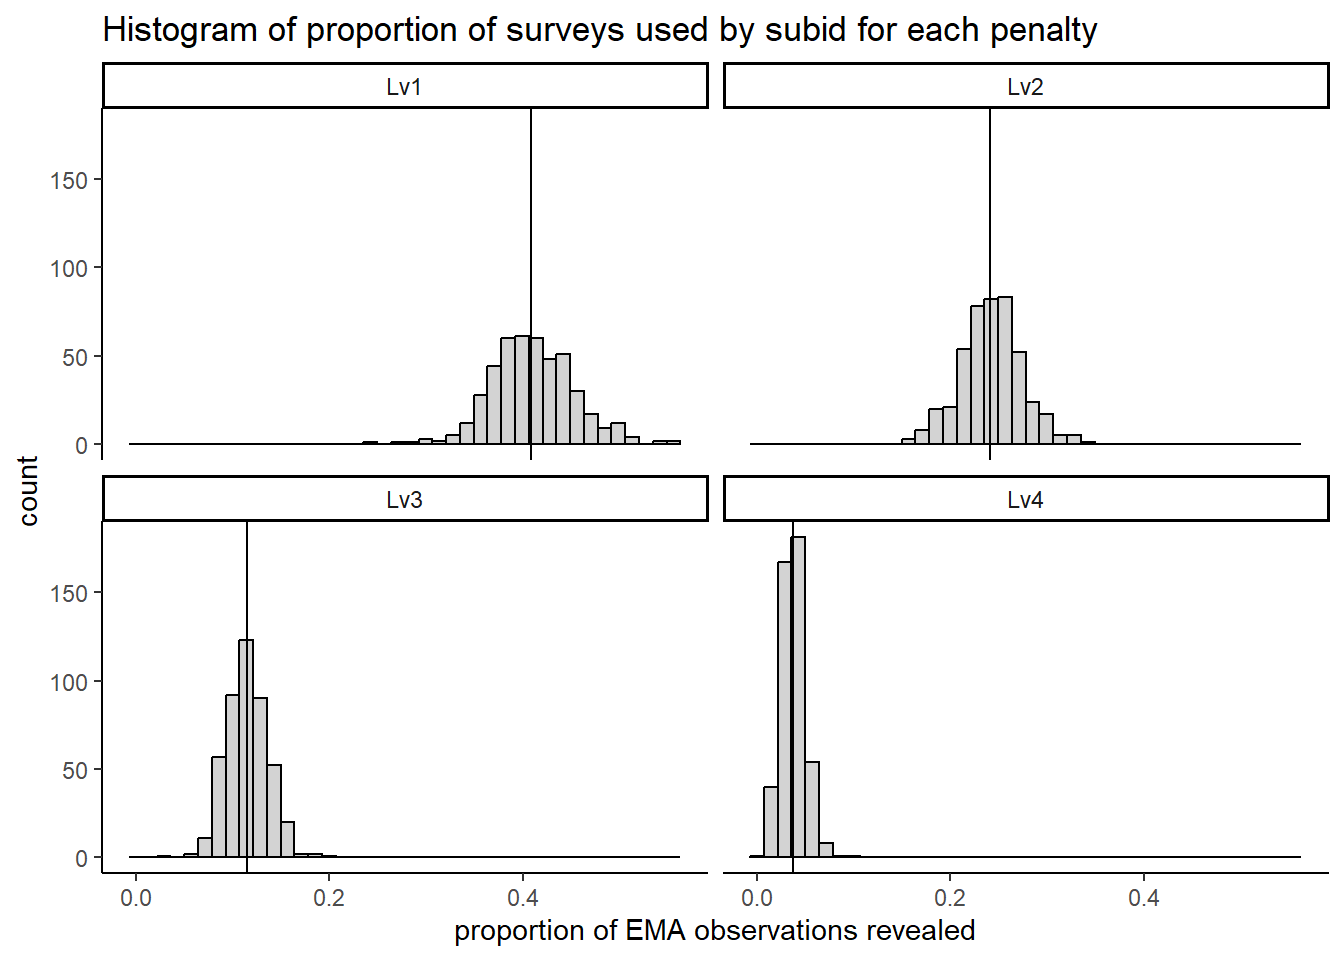

In [ ]:
freq |> 
  filter(model != "no penalty") |> 
  ggplot(aes(x = prop)) +
  geom_histogram(color = "black", fill = "light grey", bins = 40) +
  facet_wrap(~model) +
  geom_vline(aes(xintercept = med), freq |> 
               filter(model != "no penalty") |> 
               group_by(model) |> 
               mutate(med = median(prop))) +
  labs(title = "Histogram of proportion of surveys used by subid for each penalty",
       x = "proportion of EMA observations revealed")

There doesn’t appear to be a relationship between lapse and proportion of EMA surveys revealed.

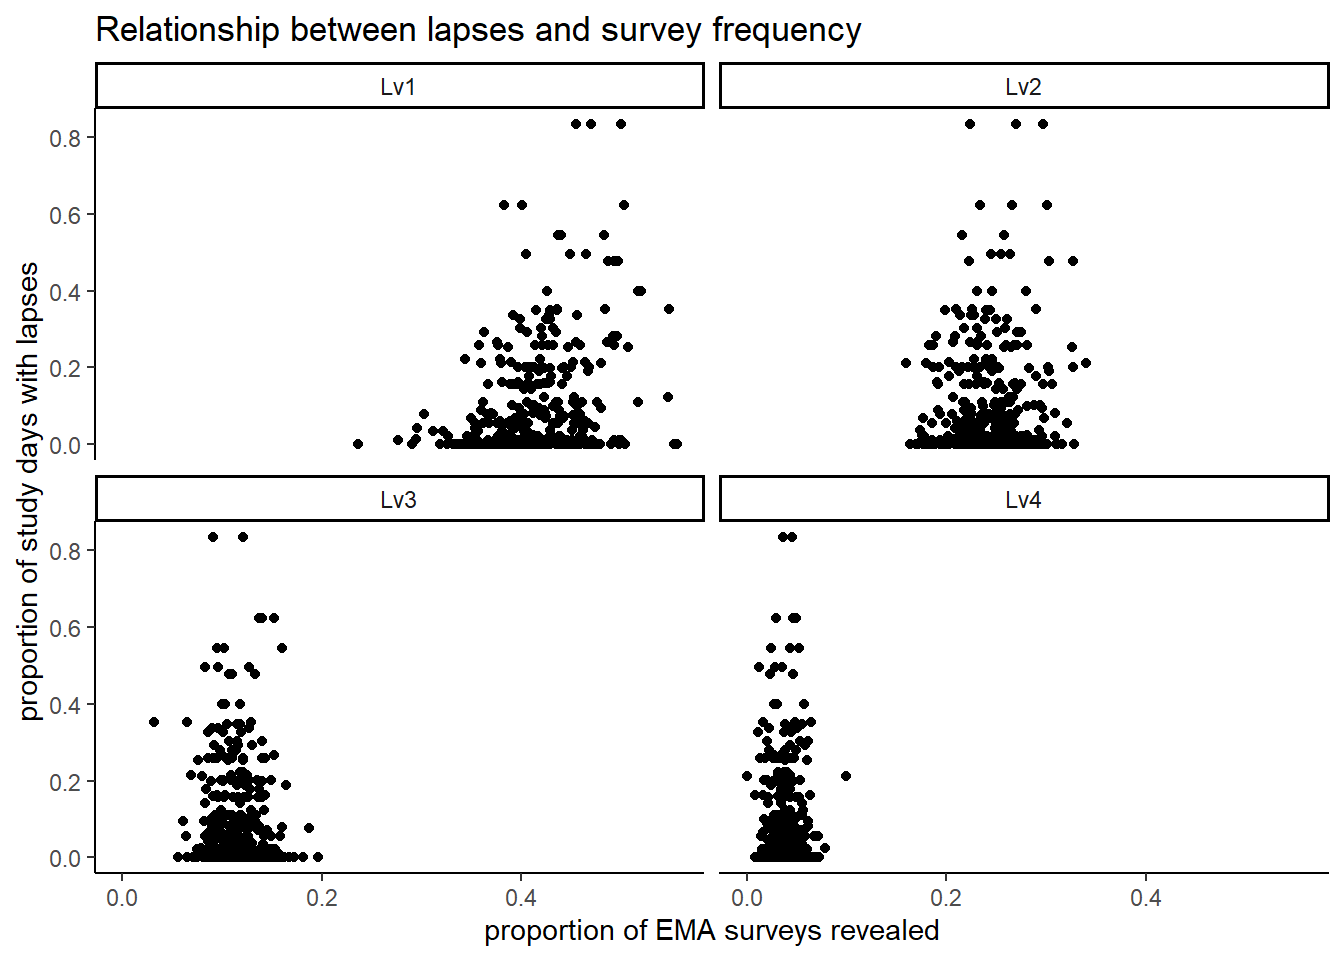

In [ ]:
freq |>
  filter(model != "no penalty") |> 
  left_join(lapses, by = "subid") |> 
  ggplot(aes(x = prop, y = prop_lapse_days), alpha = .8) +
  geom_point() +
  facet_wrap(~model) +
  labs(title = "Relationship between lapses and survey frequency",
       x = "proportion of EMA surveys revealed",
       y = "proportion of study days with lapses")

### Model Evaluation

Raw median auROCs for xgboost and five neural net models are presented below.

In [ ]:
aucs |> 
  group_by(n_repeat) |> 
  summarise(across(xgboost:nn_lv4, ~median(.x))) |> 
  ungroup() |> 
  summarise(across(xgboost:nn_lv4, ~median(.x))) |> 
  glimpse() 

Rows: 1
Columns: 6
$ xgboost <dbl> 0.895
$ nn_full <dbl> 0.88
$ nn_lv1  <dbl> 0.87
$ nn_lv2  <dbl> 0.855
$ nn_lv3  <dbl> 0.835
$ nn_lv4  <dbl> 0.775

Median posterior probabilities and 95% Bayesian credible intervals for auROC for the XGBoost and 5 neural network models are presented in the table below.

In [ ]:
pp_tibble |> 
  kableExtra::kbl(digits = 3)

Potential main figure

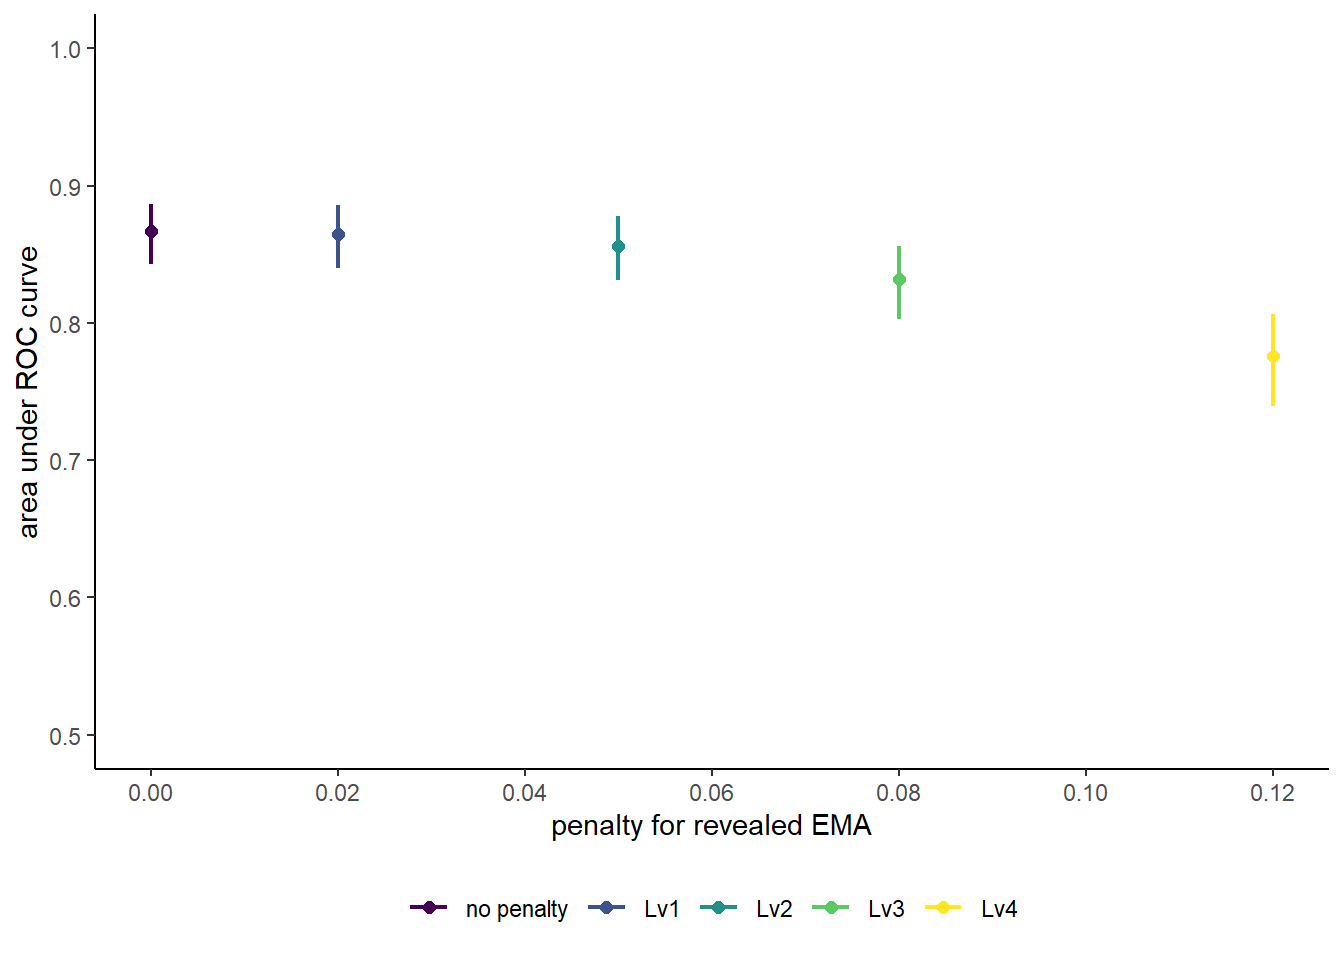

In [ ]:
pp_tibble |> 
  filter(model != "xgboost") |> 
  mutate(penalty = c(0, .02, .05, .08, .12)) |> 
  ggplot(aes(x = penalty, y = pp_median)) +
  geom_point(aes(color = model), size = 2) +
  geom_segment(mapping = aes(x = penalty, y = pp_lower, yend = pp_upper,
                             color = model), linewidth = .75) +
  scale_y_continuous("area under ROC curve", limits = c(.5, 1)) +
  scale_x_continuous("penalty for revealed EMA", 
                     breaks = c(0, .02, .04, .06, .08, .10, .12)) +
  scale_color_viridis_d(option = "D") +
  labs(color = NULL) +
  theme(legend.position = "bottom")

Histograms of posterior probabilities for auROC for the 5 neural network models are presented below.

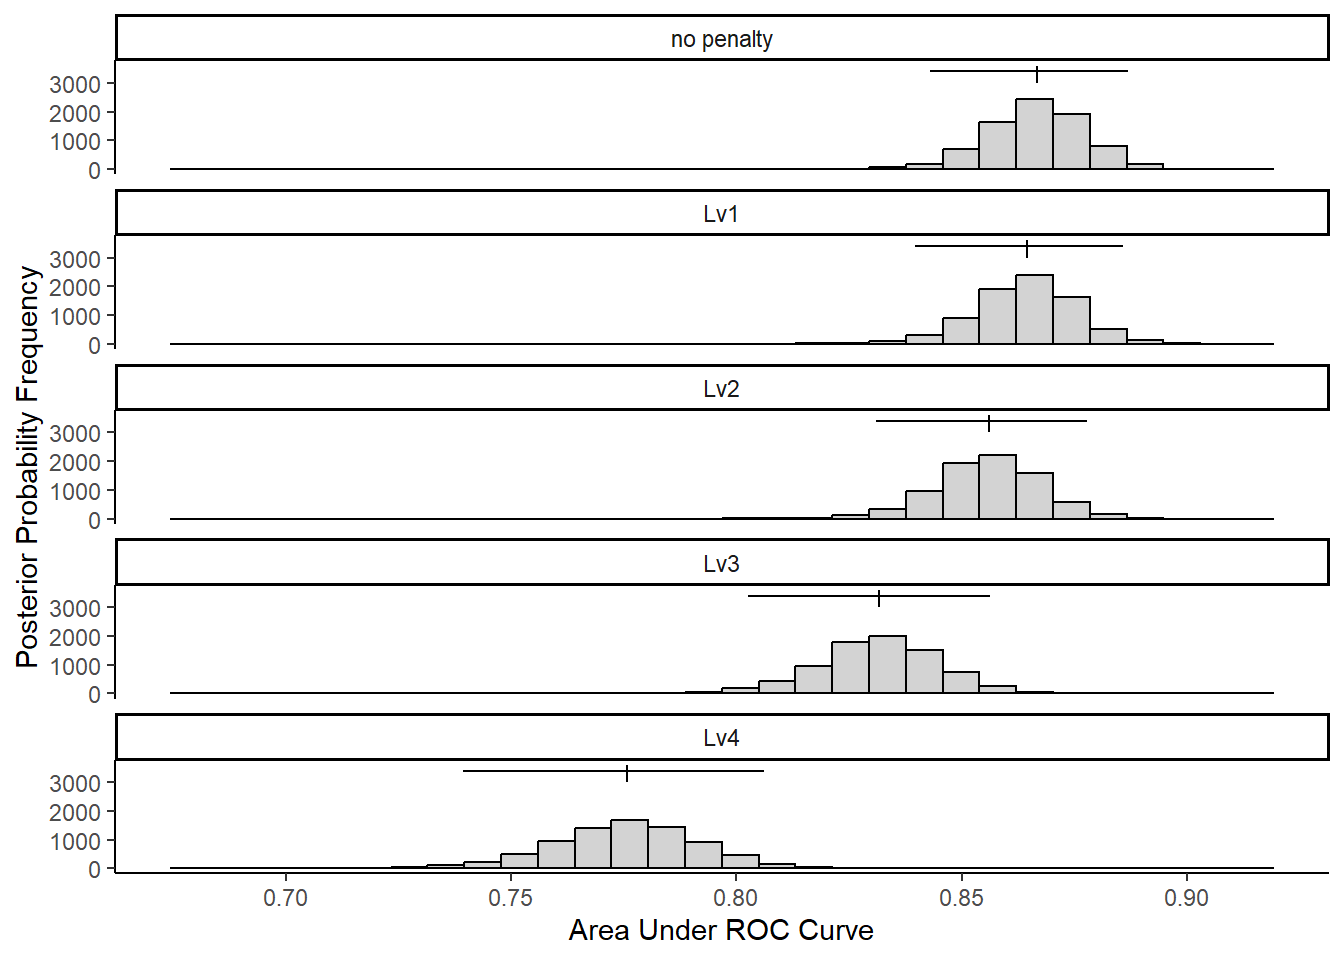

In [ ]:
posteriors |> 
  mutate(model = factor(model, 
                        levels = c("nn_full", "nn_lv1", "nn_lv2", 
                                   "nn_lv3", "nn_lv4"),
                        labels = c("no penalty", "Lv1", "Lv2", 
                                   "Lv3", "Lv4"))) |>
  filter(model != "xgboost") |> 
  ggplot() + 
  geom_histogram(aes(x = posterior), fill = "light grey", color = "black", 
                 bins = 30) +
  geom_segment(mapping = aes(y = 3000, yend = 3600, x = pp_median, 
                             xend = pp_median),
               data = subset(pp_tibble, model != "xgboost")) +
  geom_segment(mapping = aes(y = 3400, yend = 3400, x = pp_lower, xend = pp_upper),
                data = subset(pp_tibble, model != "xgboost")) +
  facet_wrap(~model, ncol = 1) +
  ylab("Posterior Probability Frequency") +
  xlab("Area Under ROC Curve") +
  theme_classic() 

### Model Comparisons

*Kendra will add a description of the model comparisons below once I see how we are referring to the different models. Essentially these comparisons suggest that we can go down to using about 40% of surveys (LV1) without any difference in model performance. It appears that the model does perform differently when going down to 25% of surveys (LV2) but this is not likely a clinically meaningful drop in performance. LV3 performs worse than LV1, but again it is not likely a clinically meaningful drop.*

In [ ]:
contrasts |> 
  kableExtra::kbl(digits = 3)